### **Proceso de EDA**

**Importo las librerias requeridas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import gc 

In [2]:
# Importo los datasets del proceso ETL

url_1 = 'https://drive.google.com/uc?id=1Du_gvJUXktgUGZTi7dF7CHyR-R7H_U8m'
df_movie_score = pd.read_csv(url_1)

url_2 = 'https://drive.google.com/uc?id=1sRRt0Pz6grtoC7TNTNQEnmL60-EO-bzA'
df_score_total = pd.read_parquet(url_2)

### **Análisis Exploratorio de Datos**

**1) Movies.**

In [4]:
# Visualizo la información
df_movie_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   show_id        22998 non-null  object 
 2   type           22998 non-null  object 
 3   title          22998 non-null  object 
 4   director       14739 non-null  object 
 5   cast           17677 non-null  object 
 6   country        11499 non-null  object 
 7   date_added     13444 non-null  object 
 8   release_year   22998 non-null  int64  
 9   rating         22998 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  plataforma     22998 non-null  object 
 13  duration_int   22516 non-null  float64
 14  duration_type  22516 non-null  object 
 15  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(13)
memory usage: 2.8+ MB


In [5]:
df_movie_score.head()

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,plataforma,duration_int,duration_type,score
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.5
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110.0,min,3.5
2,as3,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74.0,min,3.5
3,as4,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",amazon,69.0,min,3.5
4,as5,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,45.0,min,3.5


In [10]:
# Controlo que no haya duplicados
df_movie_score.duplicated().sum()

0

In [6]:
# Visualizo los datos faltantes
df_movie_score.isnull().sum()

id                   0
show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
plataforma           0
duration_int       482
duration_type      482
score                0
dtype: int64

In [3]:
# Evaluo el porcentaje de datos faltantes

print('Porcentaje de valores faltantes de la columna director:', (df_movie_score.director.isnull().sum()/len(df_movie_score)) * 100)
print('Porcentaje de valores faltantes de la columna cast:', (df_movie_score.cast.isnull().sum()/len(df_movie_score)) * 100)
print('Porcentaje de valores faltantes de la columna country:', (df_movie_score.country.isnull().sum()/len(df_movie_score)) * 100)
print('Porcentaje de valores faltantes de la columna date_added:', (df_movie_score.date_added.isnull().sum()/len(df_movie_score)) * 100)

Porcentaje de valores faltantes de la columna director: 35.91181841899296
Porcentaje de valores faltantes de la columna cast: 23.1367945038699
Porcentaje de valores faltantes de la columna country: 50.0
Porcentaje de valores faltantes de la columna date_added: 41.5427428472041


In [4]:
# Las columnas con datos faltantes corresponden a 'director', 'cast', 'country', 'date_added', 'duration_type' (datos categóricos) y 'duration_int'. 
# Coloco SD/NA donde tengamos datos faltantes en esas columnas.

df_movie_score.director.replace(np.nan, 'SD', inplace = True)
df_movie_score.cast.replace(np.nan, 'SD', inplace = True)
df_movie_score.country.replace(np.nan, 'SD', inplace = True)
df_movie_score.date_added.replace(np.nan, 'SD', inplace = True)
df_movie_score.duration_int .replace(np.nan, 'NA', inplace = True)
df_movie_score.duration_type .replace(np.nan, 'SD', inplace = True)

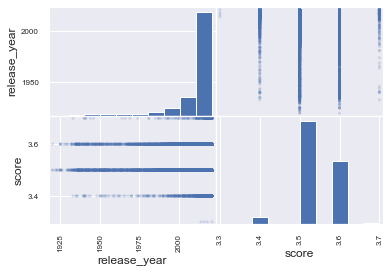

In [5]:
# Realizo un histograma.
# Visualizo grafico de dispersión entre columnas

pd.plotting.scatter_matrix(df_movie_score, alpha=0.2) 
plt.show()

**2) Score.**

In [102]:
# Visualizo la información. 
# Este Dataset va a ser con el que vamos a trabajar en el sistema de recomendación, por lo cual lo analizaré en detalle.

df_score_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   score      float64       
 2   timestamp  datetime64[ns]
 3   id         object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 336.4+ MB


In [103]:
df_score_total.head()

,userId,score,timestamp,id
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [104]:
df_score_total.duplicated().sum()

10466

In [6]:
#Elimino valores duplicados
df_score_total.drop_duplicates(inplace=True)

In [7]:
#Elimino columna 'timestamp'
df_score_id_user =df_score_total.drop(['timestamp'], axis=1)

In [8]:
df_score_id_user.head()

,userId,score,id
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500


In [9]:
print(f"Existen {df_score_id_user.shape[0]} filas y {df_score_id_user.shape[1]} columnas") 


Existen 11013823 filas y 3 columnas


In [10]:
df_score_id_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013823 entries, 0 to 11024288
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   score   float64
 2   id      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 336.1+ MB


In [14]:
print('Dataset shape: {}'.format(df_score_id_user.shape))
print('-Dataset examples-')
print(df_score_id_user.iloc[::20000, :])

Dataset shape: (11013823, 3)
-Dataset examples-
          userId  score      id
0              1    1.0   as680
20011        231    3.0   hs584
40026        432    3.0  ns4071
60043        625    5.0  as2039
80056        825    3.5  ns5828
...          ...    ...     ...
10930366  123462    4.0  ns5945
10950383  123662    4.5  as8615
10970396  123880    5.0  as5921
10990436  124016    4.5  ns1826
11010455  124198    3.0   ns198

[551 rows x 3 columns]


In [15]:
# Evaluo valores: max, min y promedio de 'score'
print('Valor promedio =',df_score_id_user.score.mean())
print('Valor maximo =',df_score_id_user.score.max())
print('Valor minimo =',df_score_id_user.score.min())

Valor promedio = 3.5334505557243836
Valor maximo = 5.0
Valor minimo = 0.5


In [16]:
# Usuarios y scores únicos:
n_users = df_score_id_user.userId.unique().shape[0]
n_scores = df_score_id_user.score.unique().shape[0]
print (str(n_users) + '  usuarios')
print (str(n_scores) + '  scores')

115077  usuarios
10  scores


In [12]:
# Número de veces que un usuario calificó películas
df_by_users = df_score_id_user.groupby(['userId']).count()
df_by_users.head()

,score,id
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


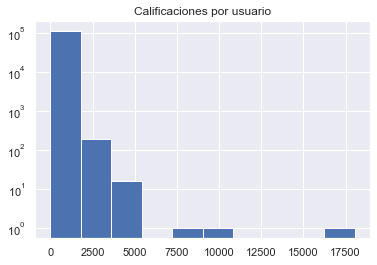

In [56]:
plt.hist(df_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

In [18]:
#Frecuencia de usuarios por voto
df_score_id_user.groupby(["score"])["userId"].count()

score
0.5     163993
1.0     350378
1.5     167371
2.0     739522
2.5     530228
3.0    2231080
3.5    1328630
4.0    2968261
4.5     919070
5.0    1615290
Name: userId, dtype: int64

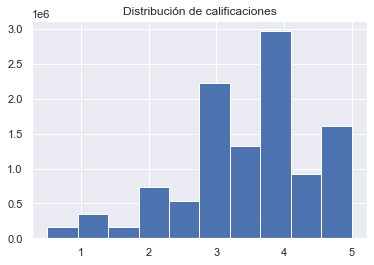

In [24]:
# Observo la distribución de las calificaciones
df_score_id_user['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

In [25]:
#Veo cuál es la película que más calificaciones tiene
df_by_movies = df_score_id_user.groupby(['id']).count()
df_by_movies.head(10)

,userId,score
id,,
as1,502,502
as10,512,512
as100,429,429
as1000,483,483
as1001,469,469
as1002,461,461
as1003,458,458
as1004,484,484
as1005,473,473


In [26]:
idx_max = df_by_movies['userId'].idxmax()
print(idx_max)

as4197


In [27]:
df_title = pd.read_csv(url_1).loc[:,('id','title')]
df_title

,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
22993,ns8803,zodiac
22994,ns8804,zombie dumb
22995,ns8805,zombieland
22996,ns8806,zoom


**Peliculas por popularidad**

In [28]:
df_by_movies = df_score_id_user.groupby(['id']).count()
df_by_movies.sort_values('userId', ascending = False, inplace = True)
df_by_movies['vistos'] = df_by_movies['userId']
df_by_movies.drop(columns = ['userId','score'], inplace = True)
df_by_movies.head(10)

,vistos
id,
as4197,575
as9065,560
ns7279,558
as848,557
hs2360,556
as6998,555
as4889,554
as9469,554
hs582,554


In [29]:
# Visualizo la película que tiene más vista
pd.merge(df_by_movies,df_title,how='inner',on='id')

,id,vistos,title
0,as4197,575,from other worlds
1,as9065,560,the organization
2,ns7279,558,"leapfrog: sing-along, read-along"
3,as848,557,superbook
4,hs2360,556,dietland
...,...,...,...
22993,ds782,404,cars toon: hiccups
22994,ns6535,402,cop and a half: new recruit
22995,hs1711,401,i am alone
22996,ns2144,399,"rob schneider: asian momma, mexican kids"


In [30]:
print('Menor número de películas vistas :', df_by_movies.vistos.min())
print('Mayor número de películas vistas :', df_by_movies.vistos.max())

Menor número de películas vistas : 396
Mayor número de películas vistas : 575


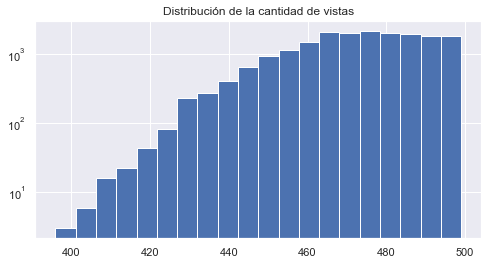

In [31]:
plt.figure(figsize = (8,4))

df_by_movies.vistos[df_by_movies.vistos<500].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')

plt.show()

**En esta etapa, lo que haremos será filtrar de nuestro dataset a aquellas películas con pocas calificaciones. Para ello, establecemos un umbral.**

In [32]:
umbral = 450
mascara_pocos_vistos = df_by_movies.vistos<umbral

In [33]:
peliculas_pocos_vistos = mascara_pocos_vistos[mascara_pocos_vistos].index.values
print(len(peliculas_pocos_vistos), peliculas_pocos_vistos)

2058 ['ns4526' 'as5382' 'ds1318' ... 'hs1711' 'ns2144' 'as4940']


In [34]:
mascara_descartables = df_score_id_user.id.isin(peliculas_pocos_vistos)

In [35]:
# Obsevo cómo cambia la cantidad de registros a partir del filtrado
print(df_score_id_user.shape)
df_score_id_user_umbral = df_score_id_user[~mascara_descartables]
print(df_score_id_user.shape)

(11013823, 3)
(11013823, 3)


In [36]:
df_score_id_user.head()

,userId,score,id
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500


In [38]:
# Cambio la columna 'id' a la primer posición
first_column = df_score_id_user.pop('id')
df_score_id_user.insert(0, 'id', first_column)
df_score_id_user

,id,userId,score
0,as680,1,1.0
1,ns2186,1,4.5
2,hs2381,1,5.0
3,ns3663,1,5.0
4,as9500,1,5.0
...,...,...,...
11024284,ns5272,124380,4.5
11024285,ns5492,124380,2.5
11024286,hs305,124380,3.5
11024287,ns7881,124380,4.5


In [39]:
# Guardo el dataset limpio para el proceso de ML
df_score_id_user.to_parquet('df_score_id_user.parquet', index=False)